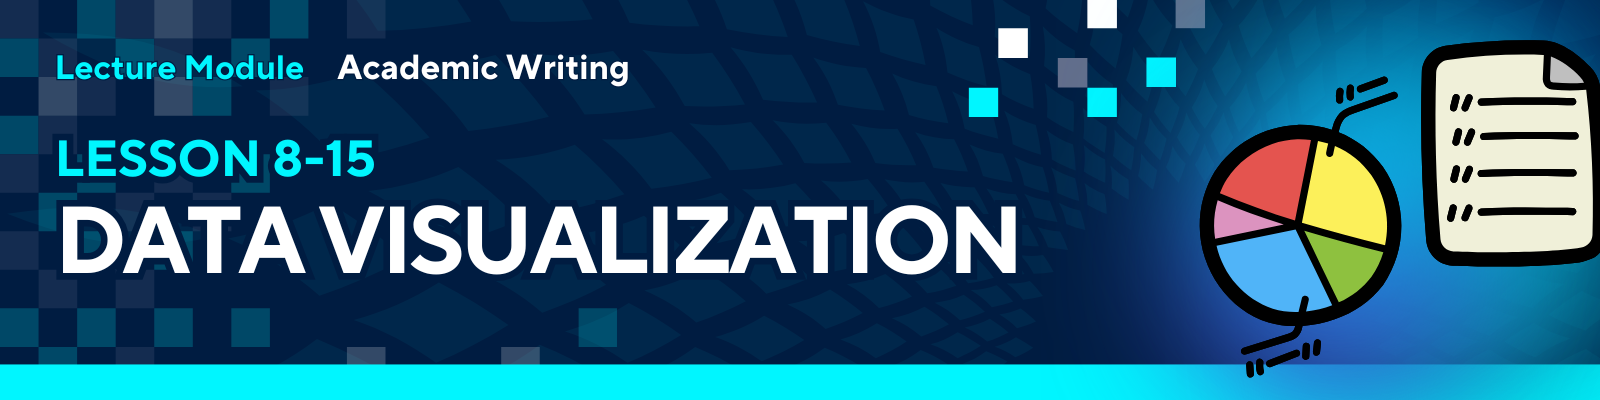

**Settings and Packages Preparation**<br>< <font color="red">**!**</font> > Run the following code whenever you open this workbook

In [1]:
import os
import joypy
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
#plt.rcParams['figure.dpi'] = 300

def load_dataset(url, filename): return pd.read_csv(filename, low_memory=False) if os.path.exists(filename) else pd.read_csv(url, low_memory=False).to_csv(filename, index=False) or pd.read_csv(filename, low_memory=False)

# If error, uncomment this:
#life_expectancy = load_dataset("https://www.dropbox.com/scl/fi/8vwam1u436lxn3d6qnf62/life_expectancy.csv?rlkey=aj5r2a8n44jo9swhcnuoo7fd5&st=r58zl09e&dl=0&raw=1", "life_expectancy.csv")
#city_temperature = load_dataset("https://www.dropbox.com/scl/fi/s4y96dto8d9vu20ao5du5/city_temperature.csv?rlkey=ppohfggy8i8v329y1dg9ub5p6&st=fuf9bpzy&dl=0&raw=1", "city_temperature.csv")

life_expectancy = load_dataset("https://www.dropbox.com/s/jr72bb2bpcxo725/life_expectancy.csv?raw=1", "life_expectancy.csv")
city_temperature = load_dataset("https://www.dropbox.com/s/d56yws7bkn3eeam/city_temperature.csv?raw=1", "city_temperature.csv")

UGLY, BAD, WRONG = "\033[33m╔\033[0m 😖 \033[33;1mUGLY!\033[0m \033[33m═══════════════════════════════\033[0m", "\033[35m╔\033[0m 👎 \033[35;1mBAD!\033[0m \033[35m═══════════════════════════════\033[0m", "\033[31m╔\033[0m ❌ \033[31;1mWRONG!\033[0m \033[31m═══════════════════════════════\033[0m"



---



# **Lesson** <font color="#B0AD89"><strong>3A ⫶⫶ </strong></font>Visualizing Multiple Distributions at Once

<img src="https://i.imgur.com/G8kZOvn.png" width=1024 />

## <font color="#B0AD89"><strong>3.1 ⫶ </strong></font>Visualization along the horizontal axis

<img src="https://i.imgur.com/o3LQ0wJ.png" width=1024 />

<img src="https://i.imgur.com/PKvI6vw.png" width=1024 />


### <font color="#B0AD89"><strong>a ⬝ </strong></font>Error bar

<img src="https://i.imgur.com/dplyxrW.png" width=1024 />


<img src="https://i.imgur.com/CPjsnQM.png" width=1024 />



In [3]:
from calendar import month_abbr

# DATA PREPARATION
tokyo_temperature = (city_temperature
    .query('City == "Tokyo" and Year == 2012')
    .loc[:, ['City', 'Month', 'AvgTemperature']]
)

# Convert Month to categorical with abbreviated month names
tokyo_temperature['Month'] = pd.Categorical(
    tokyo_temperature['Month'].map(lambda x: month_abbr[x]),
    categories=list(month_abbr)[1:],
    ordered=True
)

tokyo_temperature

,City,Month,AvgTemperature
383592,Tokyo,Jan,43.8
383593,Tokyo,Jan,43.9
383594,Tokyo,Jan,43.8
383595,Tokyo,Jan,41.2
383596,Tokyo,Jan,43.0
...,...,...,...
383953,Tokyo,Dec,39.6
383954,Tokyo,Dec,42.0
383955,Tokyo,Dec,47.0
383956,Tokyo,Dec,47.1


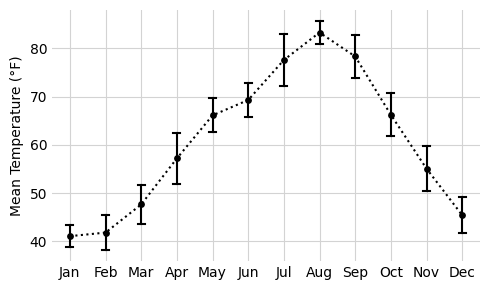

In [4]:
# Create figure
plt.figure(figsize=(5, 3))

# Create the error bar plot using seaborn, with zorder=2
sns.pointplot(
    data=tokyo_temperature,
    x='Month',
    y='AvgTemperature',
    errorbar="sd",
    color='black',
    capsize=0.2,
    linewidth=1.5,
    linestyle=':',
    zorder=2
)

# Customize the plot
plt.ylabel('Mean Temperature (°F)')
plt.xlabel('')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout
plt.tight_layout()

plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Boxplot

<img src="https://i.imgur.com/ItD4E9x.png" width=1024 />

<img src="https://i.imgur.com/ZfKDJKC.png" width=1024 />


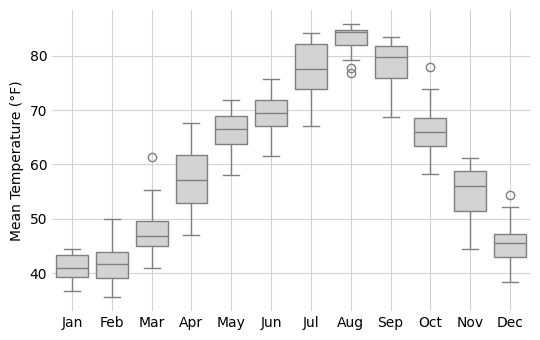

In [5]:
# Create figure
plt.figure(figsize=(5.5, 3.5))

# Create the boxplot using seaborn with zorder=2
sns.boxplot(
    data=tokyo_temperature,
    x='Month',
    y='AvgTemperature',
    color='lightgrey',
    zorder=2
)

# Customize the plot
plt.ylabel('Mean Temperature (°F)')
plt.xlabel('')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout
plt.tight_layout()

plt.show()

### <font color="#B0AD89"><strong>c ⬝ </strong></font>Violin Plot


<img src="https://i.imgur.com/BnFt6cL.png" width=1024 />

<img src="https://i.imgur.com/TEhMf80.png" width=1024 />


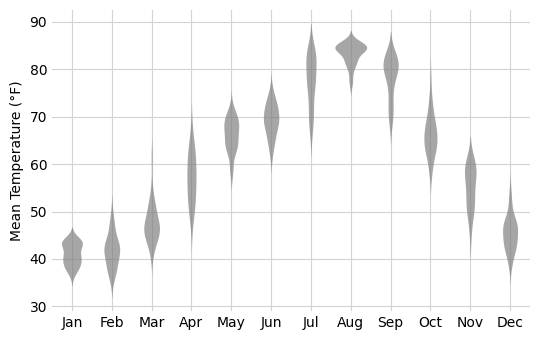

In [6]:
# Create figure
plt.figure(figsize=(5.5, 3.5))

# Create the violin plot using seaborn with zorder=2
sns.violinplot(
    data=tokyo_temperature,
    x='Month',
    y='AvgTemperature',
    color='grey',
    alpha=0.7,
    linewidth=0,
    zorder=2
)

# Customize the plot
plt.ylabel('Mean Temperature (°F)')
plt.xlabel('')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout
plt.tight_layout()

plt.show()


<img src="https://i.imgur.com/VxpGYqn.png" width=1024 />

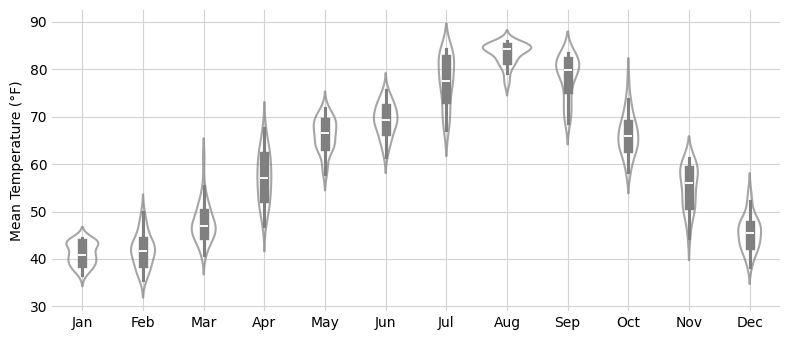

In [7]:
# Create figure
plt.figure(figsize=(8, 3.5))

# Create the violin plot using seaborn with zorder=2
sns.violinplot(
    data=tokyo_temperature,
    x='Month',
    y='AvgTemperature',
    color='grey',
    fill=False,
    alpha=0.7,
    zorder=2
)

# Customize the plot
plt.ylabel('Mean Temperature (°F)')
plt.xlabel('')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout
plt.tight_layout()

plt.show()

### <font color="#B0AD89"><strong>d ⬝ </strong></font>Strip Chart


<img src="https://i.imgur.com/5A4j9UE.png" width=1024 />

<img src="https://i.imgur.com/TqkqIN8.png" width=1024 />


╔ 👎 BAD! ═══════════════════════════════


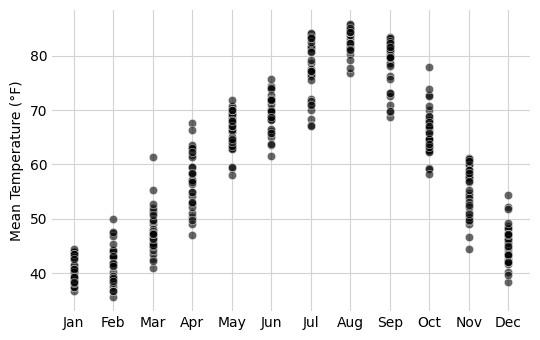

In [8]:
print(BAD)

# Create figure
plt.figure(figsize=(5.5, 3.5))

# Create the scatter plot
sns.scatterplot(
    data=tokyo_temperature,
    x='Month',
    y='AvgTemperature',
    color='black',
    alpha=0.6,
    zorder=2
)

# Customize the plot
plt.ylabel('Mean Temperature (°F)')
plt.xlabel('')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout
plt.tight_layout()

plt.show()


<img src="https://i.imgur.com/FarU3dm.png" width=1024 />


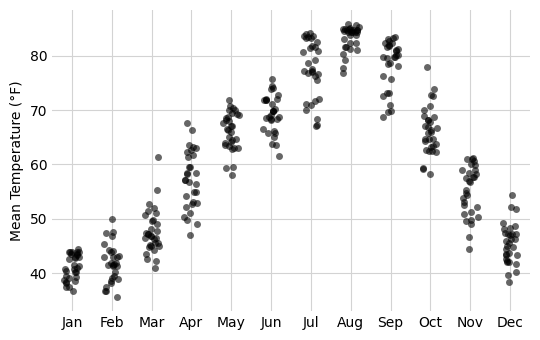

In [9]:
# Create figure
plt.figure(figsize=(5.5, 3.5))

# Create the jitter plot using seaborn with zorder=2
sns.stripplot(
    data=tokyo_temperature,
    x='Month',
    y='AvgTemperature',
    jitter=0.2,  # controls both width and height of jitter
    color='black',
    alpha=0.6,
    s=5,
    zorder=2
)

# Customize the plot
plt.ylabel('Mean Temperature (°F)')
plt.xlabel('')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout
plt.tight_layout()

plt.show()

### <font color="#B0AD89"><strong>e ⬝ </strong></font>Sina Plot


<img src="https://i.imgur.com/ElPQDXV.png" width=1024 />


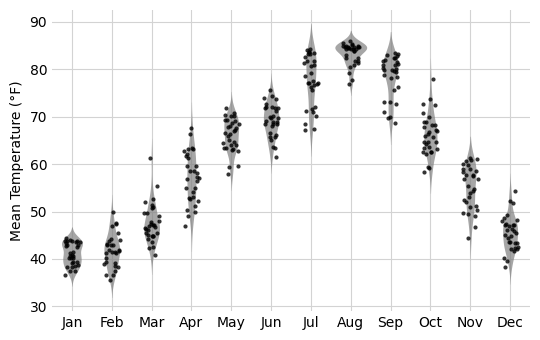

In [10]:
# Create figure
plt.figure(figsize=(5.5, 3.5))

# Create the violin plot
sns.violinplot(
    data=tokyo_temperature,
    x='Month',
    y='AvgTemperature',
    color='grey',
    alpha=0.7,
    linewidth=0,  # removes the outline
    zorder=2
)

# Add jitter plot on top with zorder=3
sns.stripplot(
    data=tokyo_temperature,
    x='Month',
    y='AvgTemperature',
    size=3,
    jitter=0.2,
    color='black',
    alpha=0.8,
    zorder=3  # higher zorder to appear on top of violin plot
)

# Customize the plot
plt.ylabel('Mean Temperature (°F)')
plt.xlabel('')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout
plt.tight_layout()

plt.show()

### <font color="#B0AD89"><strong>f ⬝ </strong></font>Swarm Plot

<img src="https://i.imgur.com/5Sau7AZ.png" width=1024 />

/mnt/data/Documents/M1 classes/Academic Writing in English/data_viz/.venv/lib64/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mnt/data/Documents/M1 classes/Academic Writing in English/data_viz/.venv/lib64/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 22.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mnt/data/Documents/M1 classes/Academic Writing in English/data_viz/.venv/lib64/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


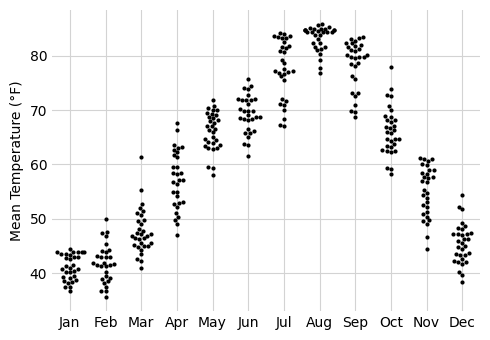

In [11]:
# Create figure
plt.figure(figsize=(5, 3.5))

# Create the jitter plot using seaborn with zorder=2
sns.swarmplot(
    data=tokyo_temperature,
    x='Month',
    y='AvgTemperature',
    color='black',
    s=3,
    zorder=2
)

# Customize the plot
plt.ylabel('Mean Temperature (°F)')
plt.xlabel('')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout
plt.tight_layout()

plt.show()

<img src="https://i.imgur.com/llKCJR3.png" width=1024 />

/mnt/data/Documents/M1 classes/Academic Writing in English/data_viz/.venv/lib64/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mnt/data/Documents/M1 classes/Academic Writing in English/data_viz/.venv/lib64/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mnt/data/Documents/M1 classes/Academic Writing in English/data_viz/.venv/lib64/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 22.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


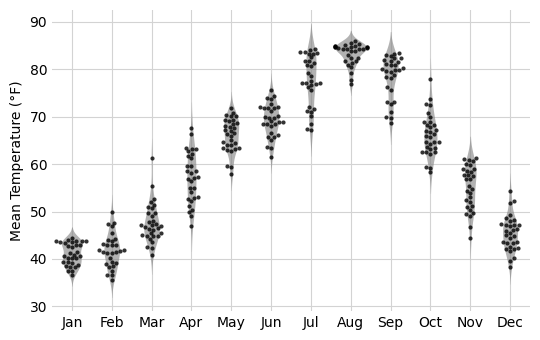

In [12]:
# Create figure
plt.figure(figsize=(5.5, 3.5))

# Create the violin plot
sns.violinplot(
    data=tokyo_temperature,
    x='Month',
    y='AvgTemperature',
    color='grey',
    alpha=0.6,
    linewidth=0,  # removes the outline
    zorder=2
)

# Add swarm plot on top with zorder=3
sns.swarmplot(
    data=tokyo_temperature,
    x='Month',
    y='AvgTemperature',
    size=3,
    color='black',
    alpha=0.8,
    zorder=3  # higher zorder to appear on top of violin plot
)

# Customize the plot
plt.ylabel('Mean Temperature (°F)')
plt.xlabel('')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout
plt.tight_layout()

plt.show()

## <font color="#B0AD89"><strong>  Practice 3.1 ᆢ</strong></font>ᆢᆢ
**Issue: Does the life expectancy in African countries are getting better?**

From the following dataset, make a boxplot, a sina plot, and a swarmplot, showing the life expectancy of the African countries each year.


In [13]:
# Data preparation
life_exp_years = (life_expectancy
    .query('Region == "Africa"')
    .loc[:, ['Year', 'Life_expectancy']]
)

# Convert Year to categorical
life_exp_years['Year'] = life_exp_years['Year'].astype('category')

life_exp_years

,Year,Life_expectancy
17,2007,60.7
19,2012,62.9
20,2011,61.4
22,2003,53.8
23,2011,63.8
...,...,...
2842,2004,72.7
2844,2006,54.1
2851,2004,50.1
2852,2012,51.8


Boxplot:

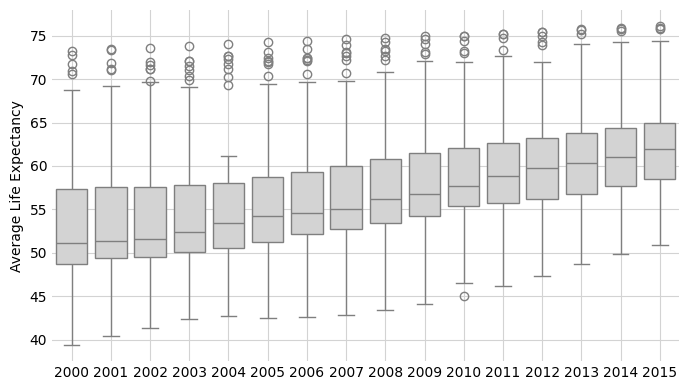

In [16]:
# Create figure
plt.figure(figsize=(7, 4))

# Create the boxplot using seaborn with zorder=2
sns.boxplot(
    data=life_exp_years,
    x='Year',
    y='Life_expectancy',
    color='lightgrey',
    zorder=2
)

# Customize the plot
plt.ylabel("Average Life Expectancy")
plt.xlabel('')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout
plt.tight_layout()

plt.show()

Sina plot (Violin plot + Strip plot with jitter):

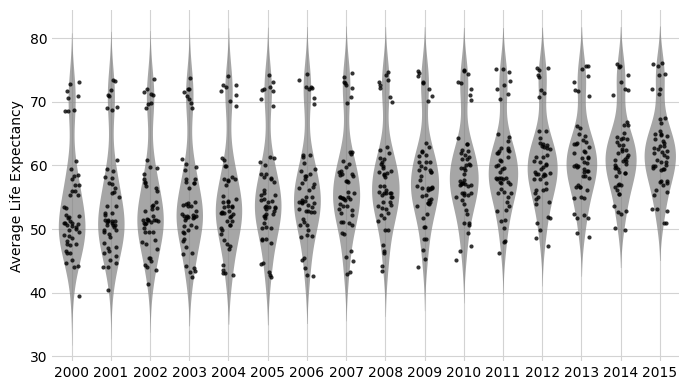

In [15]:
# Create figure
plt.figure(figsize=(7, 4))

# Create the violin plot
sns.violinplot(
    data=life_exp_years,
    x='Year',
    y='Life_expectancy',
    color='grey',
    alpha=0.7,
    linewidth=0,  # removes the outline
    zorder=2
)

# Add jitter plot on top with zorder=3
sns.stripplot(
    data=life_exp_years,
    x='Year',
    y='Life_expectancy',
    size=3,
    jitter=0.2,
    color='black',
    alpha=0.8,
    zorder=3  # higher zorder to appear on top of violin plot
)

# Customize the plot
plt.ylabel("Average Life Expectancy")
plt.xlabel('')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout
plt.tight_layout()

plt.show()

Swarm plot only:

/mnt/data/Documents/M1 classes/Academic Writing in English/data_viz/.venv/lib64/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mnt/data/Documents/M1 classes/Academic Writing in English/data_viz/.venv/lib64/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


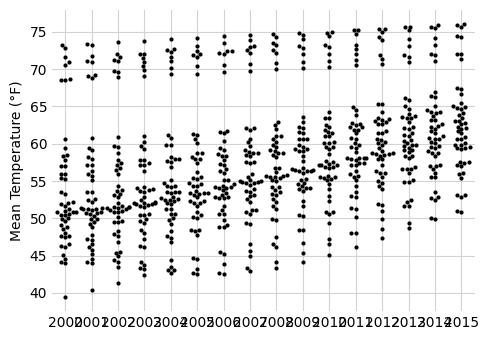

In [14]:
# Create figure
plt.figure(figsize=(5, 3.5))

# Create the jitter plot using seaborn with zorder=2
sns.swarmplot(
    data=life_exp_years,
    x='Year',
    y='Life_expectancy',
    color='black',
    s=3,
    zorder=2
)

# Customize the plot
plt.ylabel('Mean Temperature (°F)')
plt.xlabel('')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout
plt.tight_layout()

plt.show()

## <font color="#B0AD89"><strong>3.2 ⫶ </strong></font>Visualization along the vertical axis

<img src="https://i.imgur.com/7azOouq.png" width=1024 />

<img src="https://i.imgur.com/qdCNRKR.png" width=1024 />

### <font color="#B0AD89"><strong>a ⬝ </strong></font>Ridgeline plot using density plot

<img src="https://i.imgur.com/qwA09Ha.png" width=1024 />

/mnt/data/Documents/M1 classes/Academic Writing in English/data_viz/.venv/lib64/python3.12/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


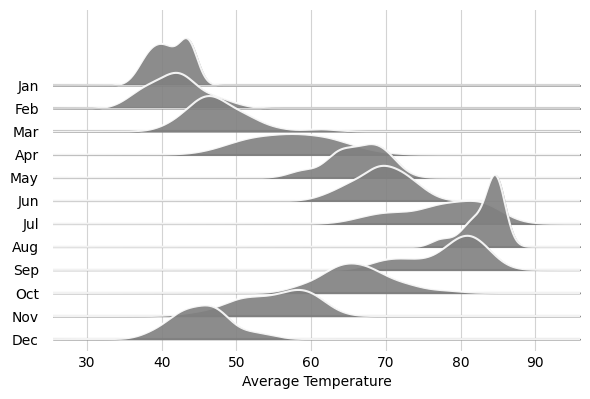

In [17]:
# Create the ridgeplot
joypy.joyplot(
    data=tokyo_temperature,
    by="Month",
    column="AvgTemperature",
    color="grey",
    linecolor = "white",
    figsize=(6,4),
    alpha=0.9,
    overlap=1
)

# Customize the plot
plt.xlabel('Average Temperature')
plt.ylabel('')

# Remove the box and ticks on both axes
for ax in plt.gcf().axes:
    ax.grid(color='lightgrey', linestyle='-', zorder=1)
    ax.spines[['top','right','left','bottom']].set_visible(False)
    ax.tick_params(length=0)

plt.show()

<img src="https://i.imgur.com/ef6WJch.png" width=1024 />

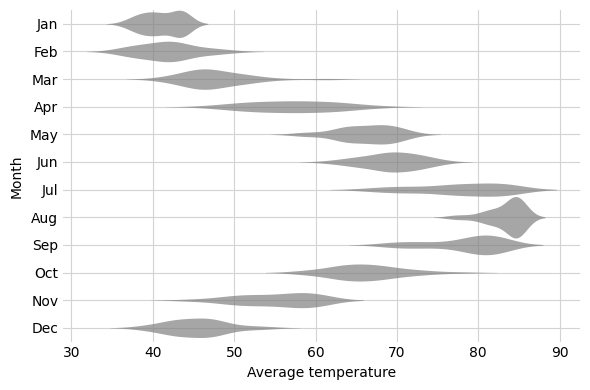

In [18]:
# Create figure
plt.figure(figsize=(6, 4))

# Create horizontal violin plot using seaborn with zorder=2
sns.violinplot(
    data=tokyo_temperature,
    x='AvgTemperature',
    y='Month',
    color='grey',
    alpha=0.7,
    linewidth=0,  # removes the outline
    orient='h',   # horizontal orientation
    width=1.5,      # width of the violin
    zorder=2
)

# Customize the plot
plt.xlabel('Average temperature')
plt.ylabel('Month')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout
plt.tight_layout()

plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Ridgeline plot using histogram


<img src="https://i.imgur.com/wSNV8ua.png" width=1024 />

/mnt/data/Documents/M1 classes/Academic Writing in English/data_viz/.venv/lib64/python3.12/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


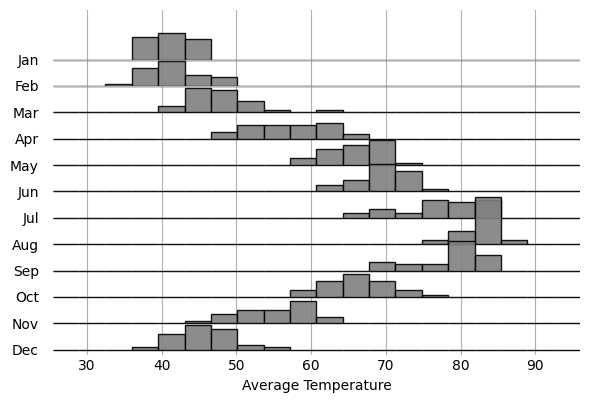

In [19]:
# Create the ridgeplot
joypy.joyplot(
    data=tokyo_temperature,
    by="Month",
    column="AvgTemperature",
    color="grey",
    figsize=(6,4),
    hist="True",
    bins=20,
    alpha=0.9,
    overlap=0.5,
    grid=True
)

# Customize the plot
plt.xlabel('Average Temperature')
plt.ylabel('')

# Remove the box and ticks on both axes
for ax in plt.gcf().axes:
    ax.spines[['top','right','left','bottom']].set_visible(False)
    ax.tick_params(length=0)

plt.show()

### <font color="#B0AD89"><strong>c ⬝ </strong></font>Ridgeline plot for bigger data

<img src="https://i.imgur.com/Ike4Mj6.png" width=1024 />

In [20]:
# Data preparation
tokyo_feb_temp = (city_temperature
   .query('City == "Tokyo" and Month == 2 and AvgTemperature != -99')
   .loc[:, ['City', 'Year', 'AvgTemperature']]
)

tokyo_feb_temp

,City,Year,AvgTemperature
377414,Tokyo,1995,41.2
377415,Tokyo,1995,43.5
377416,Tokyo,1995,43.5
377417,Tokyo,1995,39.1
377418,Tokyo,1995,37.3
...,...,...,...
386570,Tokyo,2020,51.2
386571,Tokyo,2020,46.9
386572,Tokyo,2020,44.9
386573,Tokyo,2020,47.2


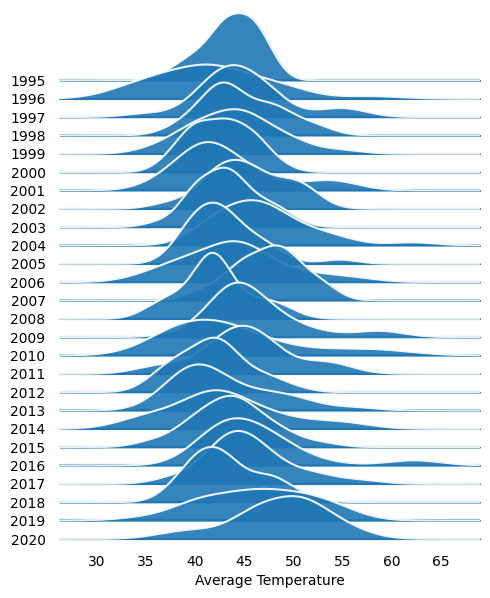

In [21]:
# Create the ridgeplot
joypy.joyplot(
    data=tokyo_feb_temp,
    by="Year",
    linecolor = "white",
    figsize=(5,6),
    alpha=0.9,
    overlap=1
)

# Customize the plot
plt.xlabel('Average Temperature')
plt.ylabel('')

# Remove the box and ticks on both axes
for ax in plt.gcf().axes:
    ax.spines[['top','right','left','bottom']].set_visible(False)
    ax.tick_params(length=0)

plt.show()

## <font color="#B0AD89"><strong>  Practice 3.2 ᆢ</strong></font>ᆢᆢ
From the following dataset, make a ridgeline plot for BMI of African countries from year 2000-2015.

In [22]:
# Data preparation to wide format
bmi_eu = (life_expectancy
    .query('Region in ["Africa"]')
    .loc[:, ['Country', 'Region', 'Year', 'BMI']]
    .assign(Year=lambda x: x['Year'].astype('category'))
#
)

bmi_eu

,Country,Region,Year,BMI
17,Comoros,Africa,2007,23.5
19,Gabon,Africa,2012,24.9
20,Ghana,Africa,2011,23.7
22,"Congo, Rep.",Africa,2003,22.3
23,Madagascar,Africa,2011,21.1
...,...,...,...,...
2842,Seychelles,Africa,2004,25.8
2844,Burkina Faso,Africa,2006,21.5
2851,Mozambique,Africa,2004,21.9
2852,Nigeria,Africa,2012,23.1


Ridgeline plot:

/mnt/data/Documents/M1 classes/Academic Writing in English/data_viz/.venv/lib64/python3.12/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


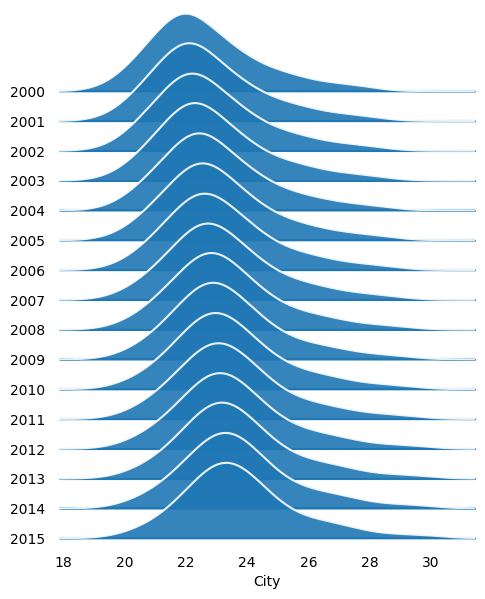

In [24]:
# Create the ridgeplot
joypy.joyplot(
    data=bmi_eu,
    by="Year",
    linecolor = "white",
    figsize=(5,6),
    alpha=0.9,
    overlap=1
)

# Customize the plot
plt.xlabel("City")
plt.ylabel('')

# Remove the box and ticks on both axes
for ax in plt.gcf().axes:
    ax.spines[['top','right','left','bottom']].set_visible(False)
    ax.tick_params(length=0)

plt.show()

## <font color="#B0AD89"><strong>3.3 ⫶ </strong></font>Visualization with multiple categories

<img src="https://i.imgur.com/vK8ye2v.png" width=1024 />


### <font color="#B0AD89"><strong>a ⬝ </strong></font>Multiple boxplot

<img src="https://i.imgur.com/PFHSCNL.png" width=1024 />


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from calendar import month_abbr

# DATA PREPARATION
japan_temperature = (city_temperature
    .query('City in ["Tokyo","Sapporo"] and Year == 2012')
    .loc[:, ['City', 'Month', 'AvgTemperature']]
)

# Convert Month to categorical with abbreviated month names
japan_temperature['Month'] = pd.Categorical(
    japan_temperature['Month'].map(lambda x: month_abbr[x]),
    categories=list(month_abbr)[1:],
    ordered=True
)

japan_temperature

,City,Month,AvgTemperature
374326,Sapporo,Jan,30.4
374327,Sapporo,Jan,24.1
374328,Sapporo,Jan,17.7
374329,Sapporo,Jan,19.7
374330,Sapporo,Jan,29.0
...,...,...,...
383953,Tokyo,Dec,39.6
383954,Tokyo,Dec,42.0
383955,Tokyo,Dec,47.0
383956,Tokyo,Dec,47.1


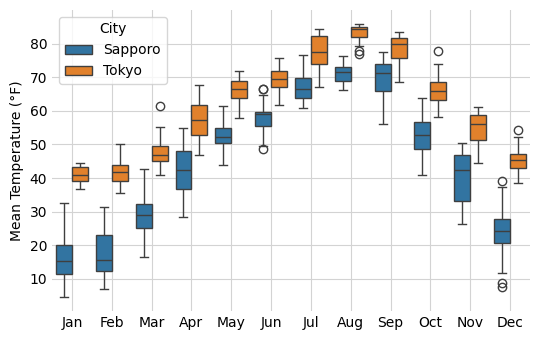

In [26]:
# Create figure
plt.figure(figsize=(5.5, 3.5))

# Create the boxplot using seaborn with zorder=2
sns.boxplot(
    data=japan_temperature,
    x='Month',
    y='AvgTemperature',
    hue='City',
    zorder=2
)

# Customize the plot
plt.ylabel('Mean Temperature (°F)')
plt.xlabel('')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout
plt.tight_layout()

plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Multiple violinplot

<img src="https://i.imgur.com/kbLQftb.png" width=1024 />


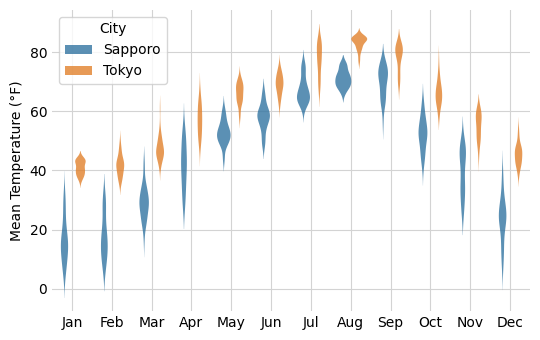

In [27]:
# Create figure
plt.figure(figsize=(5.5, 3.5))

# Create the boxplot using seaborn with zorder=2
sns.violinplot(
    data=japan_temperature,
    x='Month',
    y='AvgTemperature',
    hue='City',
    linewidth=0,
    alpha=0.8,
    zorder=2
)

# Customize the plot
plt.ylabel('Mean Temperature (°F)')
plt.xlabel('')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout
plt.tight_layout()

plt.show()

<img src="https://i.imgur.com/S4MwM9t.png" width=1024 />


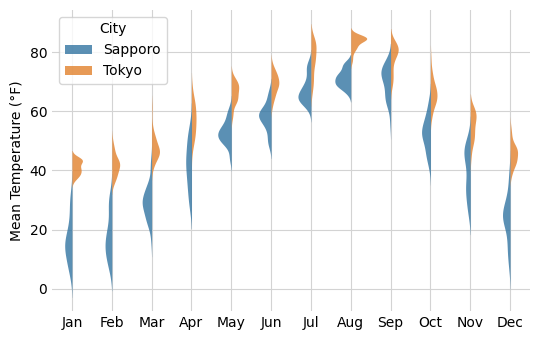

In [28]:
# Create figure
plt.figure(figsize=(5.5, 3.5))

# Create the boxplot using seaborn with zorder=2
sns.violinplot(
    data=japan_temperature,
    x='Month',
    y='AvgTemperature',
    hue='City',
    # inner='quart',
	linewidth=0,
    split=True,
    # gap=.1,
    alpha=0.8,
    zorder=2
)

# Customize the plot
plt.ylabel('Mean Temperature (°F)')
plt.xlabel('')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout
plt.tight_layout()

plt.show()

### <font color="#B0AD89"><strong>c ⬝ </strong></font>Multiple swarm plot

<img src="https://i.imgur.com/EexdKU4.png" width=1024 />


/mnt/data/Documents/M1 classes/Academic Writing in English/data_viz/.venv/lib64/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mnt/data/Documents/M1 classes/Academic Writing in English/data_viz/.venv/lib64/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mnt/data/Documents/M1 classes/Academic Writing in English/data_viz/.venv/lib64/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mnt/data/Documents/M1 classes/Academic Writing in English/data_viz/.venv/lib64/python3.12/site-packages/seaborn/categorical.py:3399: UserWarnin

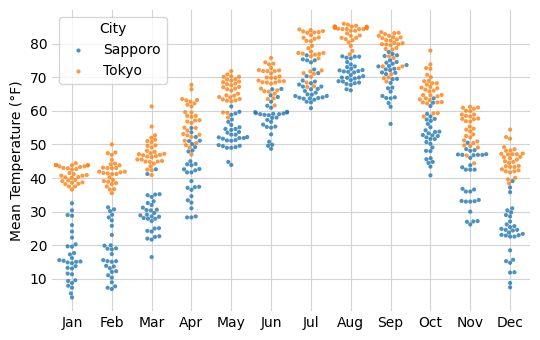

In [29]:
# Create figure
plt.figure(figsize=(5.5, 3.5))

# Create the boxplot using seaborn with zorder=2
sns.swarmplot(
    data=japan_temperature,
    x='Month',
    y='AvgTemperature',
    hue='City',
    s=3,
    alpha=0.8,
    zorder=2
)

# Customize the plot
plt.ylabel('Mean Temperature (°F)')
plt.xlabel('')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout
plt.tight_layout()

plt.show()

### <font color="#B0AD89"><strong>d ⬝ </strong></font>Ridgeline plot for multiple categories

<img src="https://i.imgur.com/8KxyY4C.png" width=1024 />


In [30]:
# Data preparation and reshaping to wide format
japan_temperature = (city_temperature
    .query('City in ["Tokyo", "Sapporo"] and Year == 2012')
    .loc[:, ['City', 'Month', 'AvgTemperature']]
    .assign(
        Month=lambda x: pd.Categorical(
            x['Month'].map(lambda x: month_abbr[x]),
            categories=list(month_abbr)[1:],
            ordered=True
        )
    )
)

# Create separate columns for each city's temperature
japan_temp_tokyo = japan_temperature[japan_temperature['City'] == 'Tokyo'].drop('City', axis=1)
japan_temp_sapporo = japan_temperature[japan_temperature['City'] == 'Sapporo'].drop('City', axis=1)

japan_temperature = (japan_temp_tokyo
    .rename(columns={'AvgTemperature': 'AvgTemperature_Tokyo'})
    .merge(
        japan_temp_sapporo.rename(columns={'AvgTemperature': 'AvgTemperature_Sapporo'}),
        on='Month'
    )
)

japan_temperature

,Month,AvgTemperature_Tokyo,AvgTemperature_Sapporo
0,Jan,43.8,30.4
1,Jan,43.8,24.1
2,Jan,43.8,17.7
3,Jan,43.8,19.7
4,Jan,43.8,29.0
...,...,...,...
11163,Dec,45.0,8.8
11164,Dec,45.0,15.7
11165,Dec,45.0,22.6
11166,Dec,45.0,35.8


/mnt/data/Documents/M1 classes/Academic Writing in English/data_viz/.venv/lib64/python3.12/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


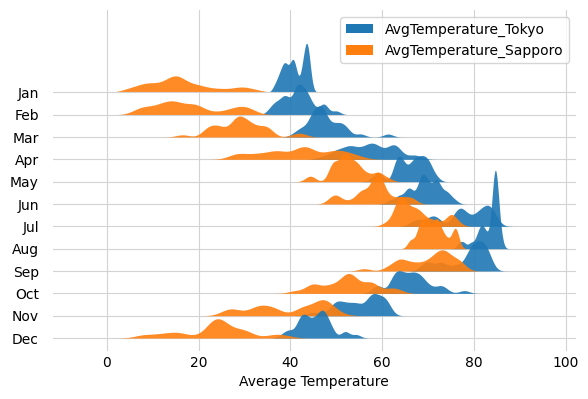

In [32]:
# Create the ridgeplot
joypy.joyplot(
    data=japan_temperature,
    by="Month",
    linewidth = 0,
    figsize=(6,4),
    alpha=0.9,
    overlap=1.5,
    legend=True
)

# Customize the plot
plt.xlabel('Average Temperature')
plt.ylabel('')

# Remove the box and ticks on both axes
for ax in plt.gcf().axes:
    ax.grid(color='lightgrey', linestyle='-', zorder=1)
    ax.spines[['top','right','left','bottom']].set_visible(False)
    ax.tick_params(length=0)

plt.show()

### <font color="#B0AD89"><strong>e ⬝ </strong></font>Common pitfall for multiple categories

<img src="https://i.imgur.com/uoHkcoK.png" width=1024 />




In [34]:
# DATA PREPARATION
japan_temperature2 = (city_temperature
    .query('City in ["Osaka", "Tokyo","Sapporo"] and Year == 2012')
    .loc[:, ['City', 'Month', 'AvgTemperature']]
)

# Convert Month to categorical with abbreviated month names
japan_temperature2['Month'] = pd.Categorical(
    japan_temperature2['Month'].map(lambda x: month_abbr[x]),
    categories=list(month_abbr)[1:],
    ordered=True
)

japan_temperature2

,City,Month,AvgTemperature
365060,Osaka,Jan,46.6
365061,Osaka,Jan,41.7
365062,Osaka,Jan,42.8
365063,Osaka,Jan,38.4
365064,Osaka,Jan,39.6
...,...,...,...
383953,Tokyo,Dec,39.6
383954,Tokyo,Dec,42.0
383955,Tokyo,Dec,47.0
383956,Tokyo,Dec,47.1


/mnt/data/Documents/M1 classes/Academic Writing in English/data_viz/.venv/lib64/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


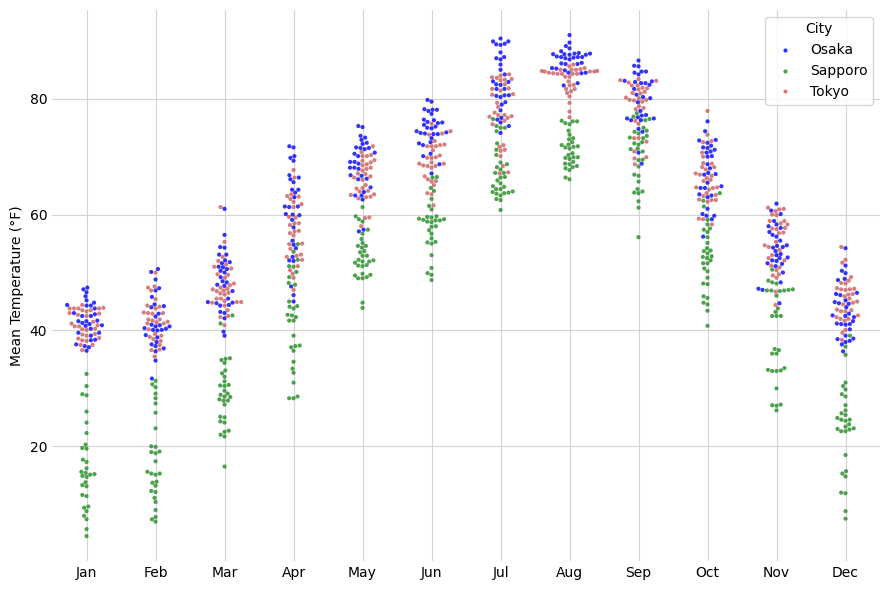

In [37]:
# Create figure
plt.figure(figsize=(9, 6))

# Create the boxplot using seaborn with zorder=2
sns.swarmplot(
    data=japan_temperature2,
    x='Month',
    y='AvgTemperature',
    hue='City',
    palette=['blue','forestgreen','indianred'],
    s=3,
    alpha=0.8,
    zorder=2
)

# Customize the plot
plt.ylabel('Mean Temperature (°F)')
plt.xlabel('')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout
plt.tight_layout()

plt.show()

<img src="https://i.imgur.com/lbMhAxj.png" width=1024 />

In [38]:
# DATA PREPARATION
cities_temperature = (city_temperature
    .query('City in ["Jakarta", "Tokyo","Sydney"] and Year == 2012 and AvgTemperature > 0')
    .loc[:, ['City', 'Month', 'AvgTemperature']]
)

# Convert Month to categorical with abbreviated month names
cities_temperature['Month'] = pd.Categorical(
    cities_temperature['Month'].map(lambda x: month_abbr[x]),
    categories=list(month_abbr)[1:],
    ordered=True
)

cities_temperature

,City,Month,AvgTemperature
355795,Jakarta,Jan,79.3
355796,Jakarta,Jan,79.9
355797,Jakarta,Jan,81.9
355798,Jakarta,Jan,83.3
355799,Jakarta,Jan,80.4
...,...,...,...
611415,Sydney,Dec,66.8
611416,Sydney,Dec,60.5
611417,Sydney,Dec,61.5
611418,Sydney,Dec,60.4


/mnt/data/Documents/M1 classes/Academic Writing in English/data_viz/.venv/lib64/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mnt/data/Documents/M1 classes/Academic Writing in English/data_viz/.venv/lib64/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mnt/data/Documents/M1 classes/Academic Writing in English/data_viz/.venv/lib64/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mnt/data/Documents/M1 classes/Academic Writing in English/data_viz/.venv/lib64/python3.12/site-packages/seaborn/categorical.py:3399: UserWarni

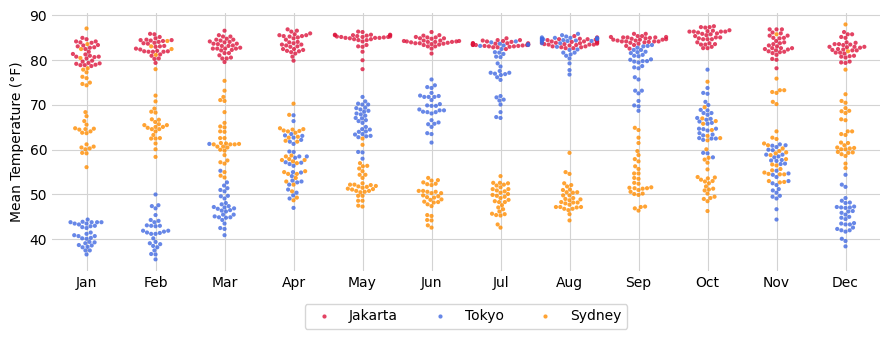

In [39]:
# Create figure
plt.figure(figsize=(9, 3.5))

# Create the boxplot using seaborn with zorder=2
sns.swarmplot(
    data=cities_temperature,
    x='Month',
    y='AvgTemperature',
    hue='City',
    palette=['crimson','royalblue','darkorange'],
    s=3,
    alpha=0.8,
    zorder=2
)

# Customize the plot
plt.ylabel('Mean Temperature (°F)')
plt.xlabel('')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.legend(bbox_to_anchor=(0.5, -0.1), ncol=4, loc='upper center')

# Adjust layout
plt.tight_layout()

plt.show()

## <font color="#B0AD89"><strong>  Practice 3.3 ᆢ</strong></font>ᆢᆢ

**Issue: Does the life expectancy in different region of Europes are different?**

From the following dataset, make a swarm plot for different subregion of European countries, showing the distribution of life expectancy.


In [40]:
# Data preparation to wide format
life_exp_eu = (life_expectancy
    .query('Region in ["Rest of Europe", "European Union", ]')
    .loc[:, ['Country', 'Year', 'Life_expectancy']]
    .assign(Year=lambda x: x['Year'].astype('category'))
)

# Define the mapping of countries to sub-regions
sub_region_map = {
    'Central and Eastern Europe': ['Hungary', 'Moldova', 'Ukraine', 'Czechia', 'Slovak Republic', 'Bulgaria', 'Romania', 'Poland', 'Latvia', 'Lithuania', 'Estonia', 'Belarus', 'Russian Federation', 'Albania', 'Bosnia and Herzegovina', 'Croatia', 'Serbia', 'Montenegro', 'North Macedonia', 'Georgia', 'Armenia', 'Slovenia'],
    'Western Europe': ['Switzerland', 'Germany', 'Denmark', 'Belgium', 'France', 'Austria', 'Netherlands', 'Luxembourg', 'Ireland', 'United Kingdom'],
    'Southern Europe': ['Spain', 'Malta', 'Greece', 'Italy', 'Portugal', 'Cyprus'],
    'Northern Europe': ['Norway', 'Finland', 'Sweden', 'Iceland']
}

# Invert the dictionary to map countries to regions
country_to_subregion = {country: region for region, countries in sub_region_map.items() for country in countries}

# Add the new column to the DataFrame
life_exp_eu['Sub_Region'] = life_exp_eu['Country'].map(country_to_subregion)

life_exp_eu

,Country,Year,Life_expectancy,Sub_Region
1,Spain,2015,82.8,Southern Europe
6,Russian Federation,2015,71.2,Central and Eastern Europe
7,Hungary,2000,71.2,Central and Eastern Europe
9,Moldova,2008,68.7,Central and Eastern Europe
11,Malta,2007,79.8,Southern Europe
...,...,...,...,...
2850,Belgium,2009,80.0,Western Europe
2855,Finland,2001,78.0,Northern Europe
2857,Belarus,2000,68.9,Central and Eastern Europe
2862,Lithuania,2002,71.8,Central and Eastern Europe


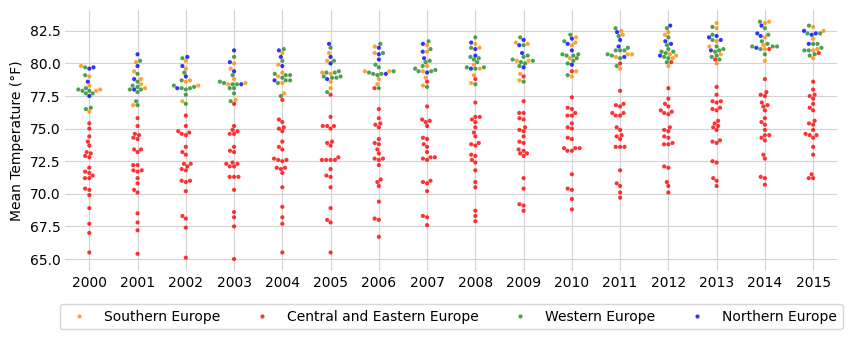

In [46]:
# Make a color palette
region_palette =  ['darkorange', 'red', 'forestgreen','blue']

# Create figure
plt.figure(figsize=(9, 3.5))

# Create the boxplot using seaborn with zorder=2
sns.swarmplot(
    data=life_exp_eu,
    x="Year",
    y="Life_expectancy",
    hue="Sub_Region",
    palette=region_palette,
    s=3,
    alpha=0.8,
    zorder=2
)

# Customize the plot
plt.ylabel("Mean Temperature (°F)")
plt.xlabel('')

# Add grid with zorder=1
plt.grid(color="lightgrey", linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.legend(bbox_to_anchor=(0.5, -0.1), ncol=4, loc="upper center")

# Adjust layout
plt.tight_layout()

plt.show()

**Issue: Does the life expectancy in African and European countries are getting better?**

From the following dataset, make a ridgeline plot for African and European Union countries, showing the distribution of both life expectancy.


In [47]:
life_expectancy['Region'].unique()

array(['Middle East', 'European Union', 'Asia', 'South America',
       'Central America and Caribbean', 'Rest of Europe', 'Africa',
       'Oceania', 'North America'], dtype=object)

In [48]:
# Data preparation to wide format
life_exp_eu_af = (life_expectancy
    .query('Region in ["Africa", "European Union"]')
    .loc[:, ['Country', 'Region', 'Year', 'Life_expectancy']]
    .assign(Year=lambda x: x['Year'].astype('category'))
    .set_index(['Year', 'Country', 'Region'])
    .unstack(level='Region', fill_value=None)
    .droplevel(0, axis=1)
    .rename(columns={'Africa': 'Life_expectancy_Africa',
                    'European Union': 'Life_expectancy_EU'})
    .reset_index()
)

life_exp_eu_af

Region,Year,Country,Life_expectancy_Africa,Life_expectancy_EU
0,2000,Algeria,70.6,NaN
1,2000,Angola,46.5,NaN
2,2000,Austria,NaN,78.1
3,2000,Belgium,NaN,77.7
4,2000,Benin,55.4,NaN
...,...,...,...,...
1243,2015,Togo,59.9,NaN
1244,2015,Tunisia,75.9,NaN
1245,2015,Uganda,61.4,NaN
1246,2015,Zambia,61.7,NaN


Visualization:

/mnt/data/Documents/M1 classes/Academic Writing in English/data_viz/.venv/lib64/python3.12/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


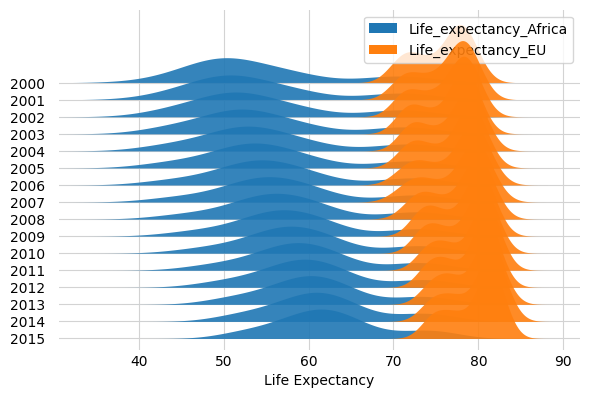

In [49]:
# Create the ridgeplot
joypy.joyplot(
    data=life_exp_eu_af,
    by="Year",
    linewidth = 0,
    figsize=(6,4),
    alpha=0.9,
    overlap=1.5,
    legend=True
)

# Customize the plot
plt.xlabel('Life Expectancy')
plt.ylabel('')

# Remove the box and ticks on both axes
for ax in plt.gcf().axes:
    ax.grid(color='lightgrey', linestyle='-', zorder=1)
    ax.spines[['top','right','left','bottom']].set_visible(False)
    ax.tick_params(length=0)

plt.show()

# **Lesson** <font color="#B0AD89"><strong>3B ⫶⫶ </strong></font>Visualizing Proportions



<img src="https://i.imgur.com/4dRo57W.png" width=1024 />

## <font color="#B0AD89"><strong>3.4 ⫶ </strong></font>Simple Proportions

<img src="https://i.imgur.com/HOGXq9M.png" width=1024 />

<img src="https://i.imgur.com/cHrHBTm.png" width=1024 />

<img src="https://i.imgur.com/bLFz1xN.png" width=1024 />

<img src="https://i.imgur.com/JCuZUtA.png" width=1024 />

<img src="https://i.imgur.com/6qwNWx5.png" width=1024 />

### <font color="#B0AD89"><strong>a ⬝ </strong></font>Pie Chart

<img src="https://i.imgur.com/sc4v2mJ.png" width=1024 />

In [50]:
# Data preparation
country_count = (life_expectancy
    .assign(
        Region=lambda x: x['Region']
            .replace({'Middle East': 'Asia'})
            .replace(regex={r'.*Europe.*': 'Europe',
                          r'.*America.*': 'Americas'})
    )
    .loc[:, ['Region', 'Country']]
    .drop_duplicates()
    .groupby('Region')
    .agg(Count=('Country', 'count'))
    .sort_values('Count', ascending=False)
    .assign(Region=lambda x: x.index)  # Changed this line
    .reset_index(drop=True)  # And added drop=True here
)

country_count

,Count,Region
0,51,Africa
1,42,Europe
2,41,Asia
3,34,Americas
4,11,Oceania


In [51]:
# Color mapping dictionary
continent_color = {
   'Europe': 'royalblue',
   'Asia': 'goldenrod',
   'Africa': 'dimgray',
   'Americas': 'firebrick',
   'Oceania': 'forestgreen'
}

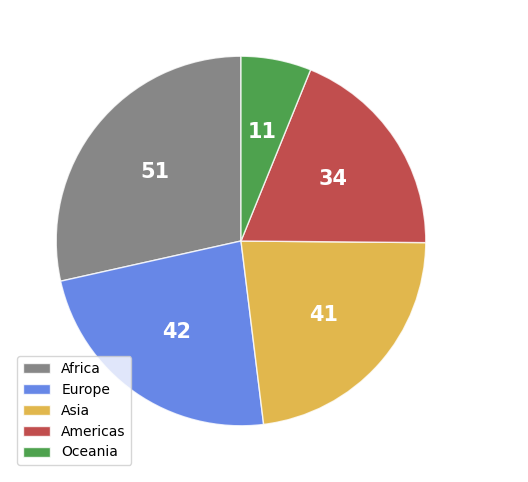

In [52]:
# Create pie chart
plt.figure(figsize=(6, 6))

# Create pie chart with white edges
plt.pie(
   country_count['Count'],
   labels=country_count['Region'],
   colors=[continent_color[r] for r in country_count['Region']],
   autopct=lambda pct: f'{int(pct*sum(country_count["Count"])/100)}',
   wedgeprops={'edgecolor': 'white', 'width': 1, 'alpha': 0.8},
   textprops={'color': 'white', 'fontweight': 'bold', 'fontsize': 15},
   startangle=90
)

# Remove axis
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Side-by-side bars

<img src="https://i.imgur.com/697HSAg.png" width=1024 />



In [53]:
# Define gulf countries and colors
gulf_countries_list = ["United Arab Emirates", "Saudi Arabia",
                     "Qatar", "Oman", "Bahrain", "Kuwait", "Iraq"]

gulf_colors = {
   'United Arab Emirates': 'darkorange',
   'Saudi Arabia': 'forestgreen',
   'Qatar': 'purple',
   'Oman': 'dodgerblue',
   'Bahrain': 'firebrick',
   'Kuwait': 'gold',
   'Iraq': 'slategray'
}

# Data preparation
gulf_countries = (life_expectancy
   .query('Country in @gulf_countries_list and Year in [2000, 2005, 2010, 2015]')
   .assign(Pop_share=lambda x: x.groupby('Year')['Population_mln']
                               .transform(lambda y: y/y.sum()))
   .loc[:, ['Country', 'Year', 'Population_mln', 'Pop_share']]
   .sort_values('Population_mln')
)

gulf_countries

,Country,Year,Population_mln,Pop_share
2690,Qatar,2000,0.59,0.011162
960,Bahrain,2000,0.66,0.012486
688,Qatar,2005,0.87,0.014062
339,Bahrain,2005,0.89,0.014385
2511,Bahrain,2010,1.24,0.016569
2848,Bahrain,2015,1.37,0.015463
1014,Qatar,2010,1.86,0.024853
2721,Kuwait,2000,2.05,0.038782
544,Kuwait,2005,2.27,0.036690
1248,Oman,2000,2.27,0.042944


<Figure size 2700x750 with 0 Axes>

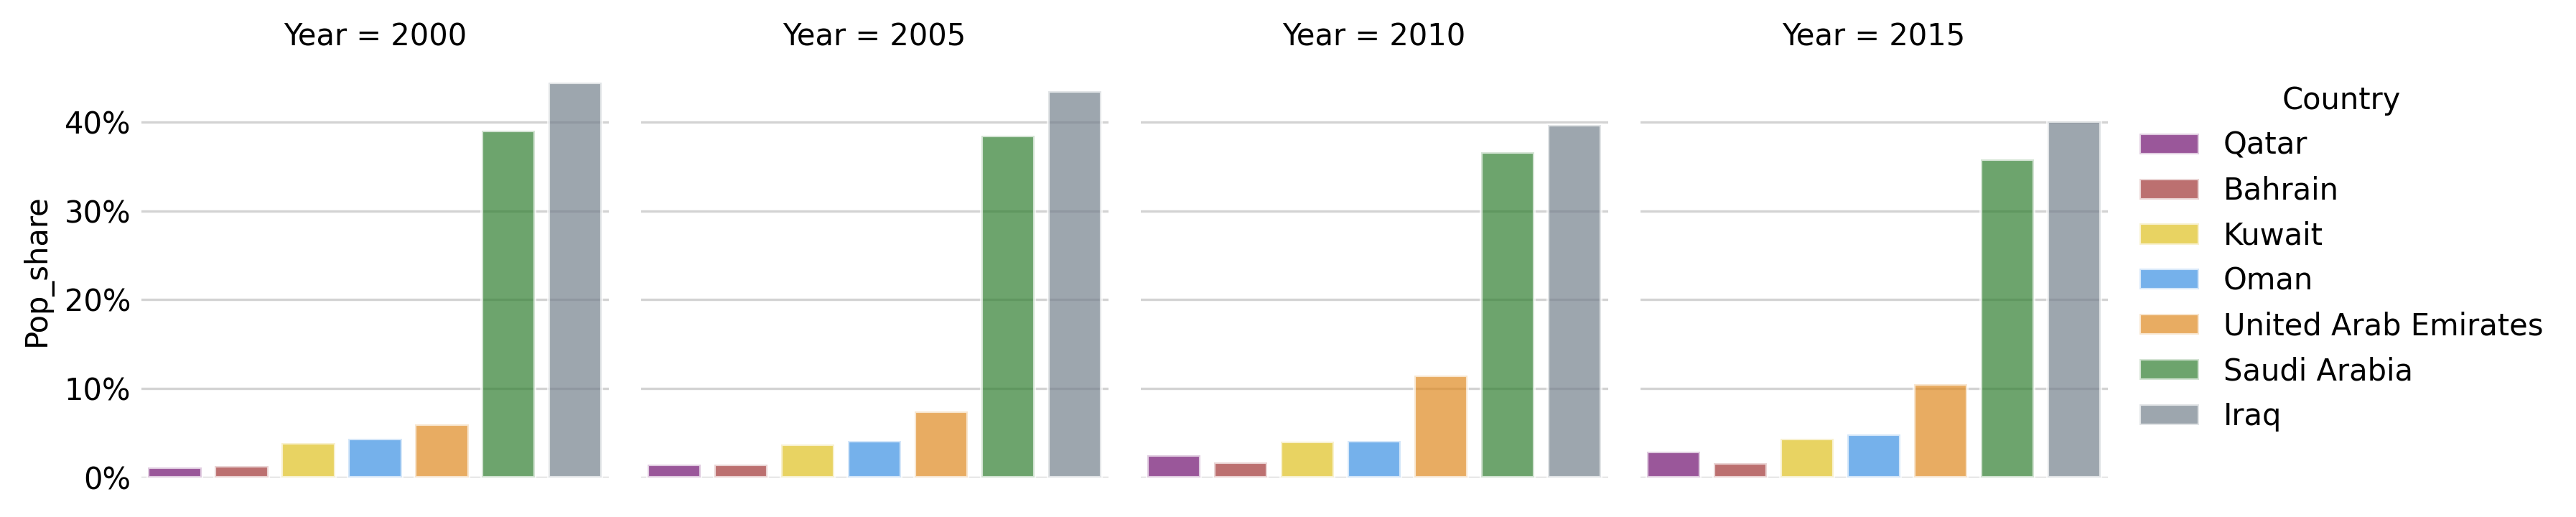

In [ ]:
# Create figure
plt.figure(figsize=(9, 2.5))

# Create facets by Year
g = sns.FacetGrid(
   data=gulf_countries,
   col='Year',
   hue='Country',
   col_wrap=4,
   height=2.5,
   aspect=0.8
)

# Map the barplot to the facets
g.map_dataframe(
   sns.barplot,
   x='Country',
   y='Pop_share',
   hue='Country',
   palette=gulf_colors,
   alpha=0.7,
   edgecolor='white',
   zorder=2
)

g.add_legend(bbox_to_anchor=(1.2, 0.5))

# Customize each subplot
for ax in g.axes:
   # Format y-axis as percentage
   ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0%}'))

   # Remove spines and ticks
   ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
   ax.tick_params(length=0)

   # Add grid
   ax.grid(axis='y', color='lightgrey', linestyle='-', zorder=1)

   # Remove x-axis label  and tick labels
   ax.set_xlabel(None)
   ax.set_xticklabels([])

plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>c ⬝ </strong></font>Stacked bars

<img src="https://i.imgur.com/Ztmb89t.png" width=1024 />


In [ ]:
# Data preparation
jakarta_temperature = (city_temperature
   .query('City == "Jakarta"')
   .loc[:, ['Year', 'AvgTemperature']]
   .assign(
       TemperatureRange=lambda x: np.where(
           x['AvgTemperature'] > 80,
           'Above 80°F',
           'Below 80°F'
       )
   )
   .groupby(['Year', 'TemperatureRange'])
   .size()
   .reset_index(name='n')
   .assign(
       Percentage=lambda x: x.groupby('Year')['n'].transform(lambda y: y/y.sum())
   )
)

# Color mapping
heat_color = {
   'Above 80°F': 'red',
   'Below 80°F': 'lightgray'
}

jakarta_temperature

    Year TemperatureRange    n  Percentage
0   1995       Above 80°F  255    0.698630
1   1995       Below 80°F  110    0.301370
2   1996       Above 80°F  231    0.631148
3   1996       Below 80°F  135    0.368852
4   1997       Above 80°F  233    0.638356
5   1997       Below 80°F  132    0.361644
6   1998       Above 80°F  225    0.616438
7   1998       Below 80°F  140    0.383562
8   1999       Above 80°F  165    0.452055
9   1999       Below 80°F  200    0.547945
10  2000       Above 80°F   56    0.153005
11  2000       Below 80°F  310    0.846995
12  2001       Above 80°F   43    0.117808
13  2001       Below 80°F  322    0.882192
14  2002       Above 80°F   40    0.109589
15  2002       Below 80°F  325    0.890411
16  2003       Above 80°F  185    0.506849
17  2003       Below 80°F  180    0.493151
18  2004       Above 80°F   99    0.270492
19  2004       Below 80°F  267    0.729508
20  2005       Above 80°F   46    0.126027
21  2005       Below 80°F  319    0.873973
22  2006   

╔ 👎 BAD! ═══════════════════════════════


<Figure size 2100x1500 with 0 Axes>

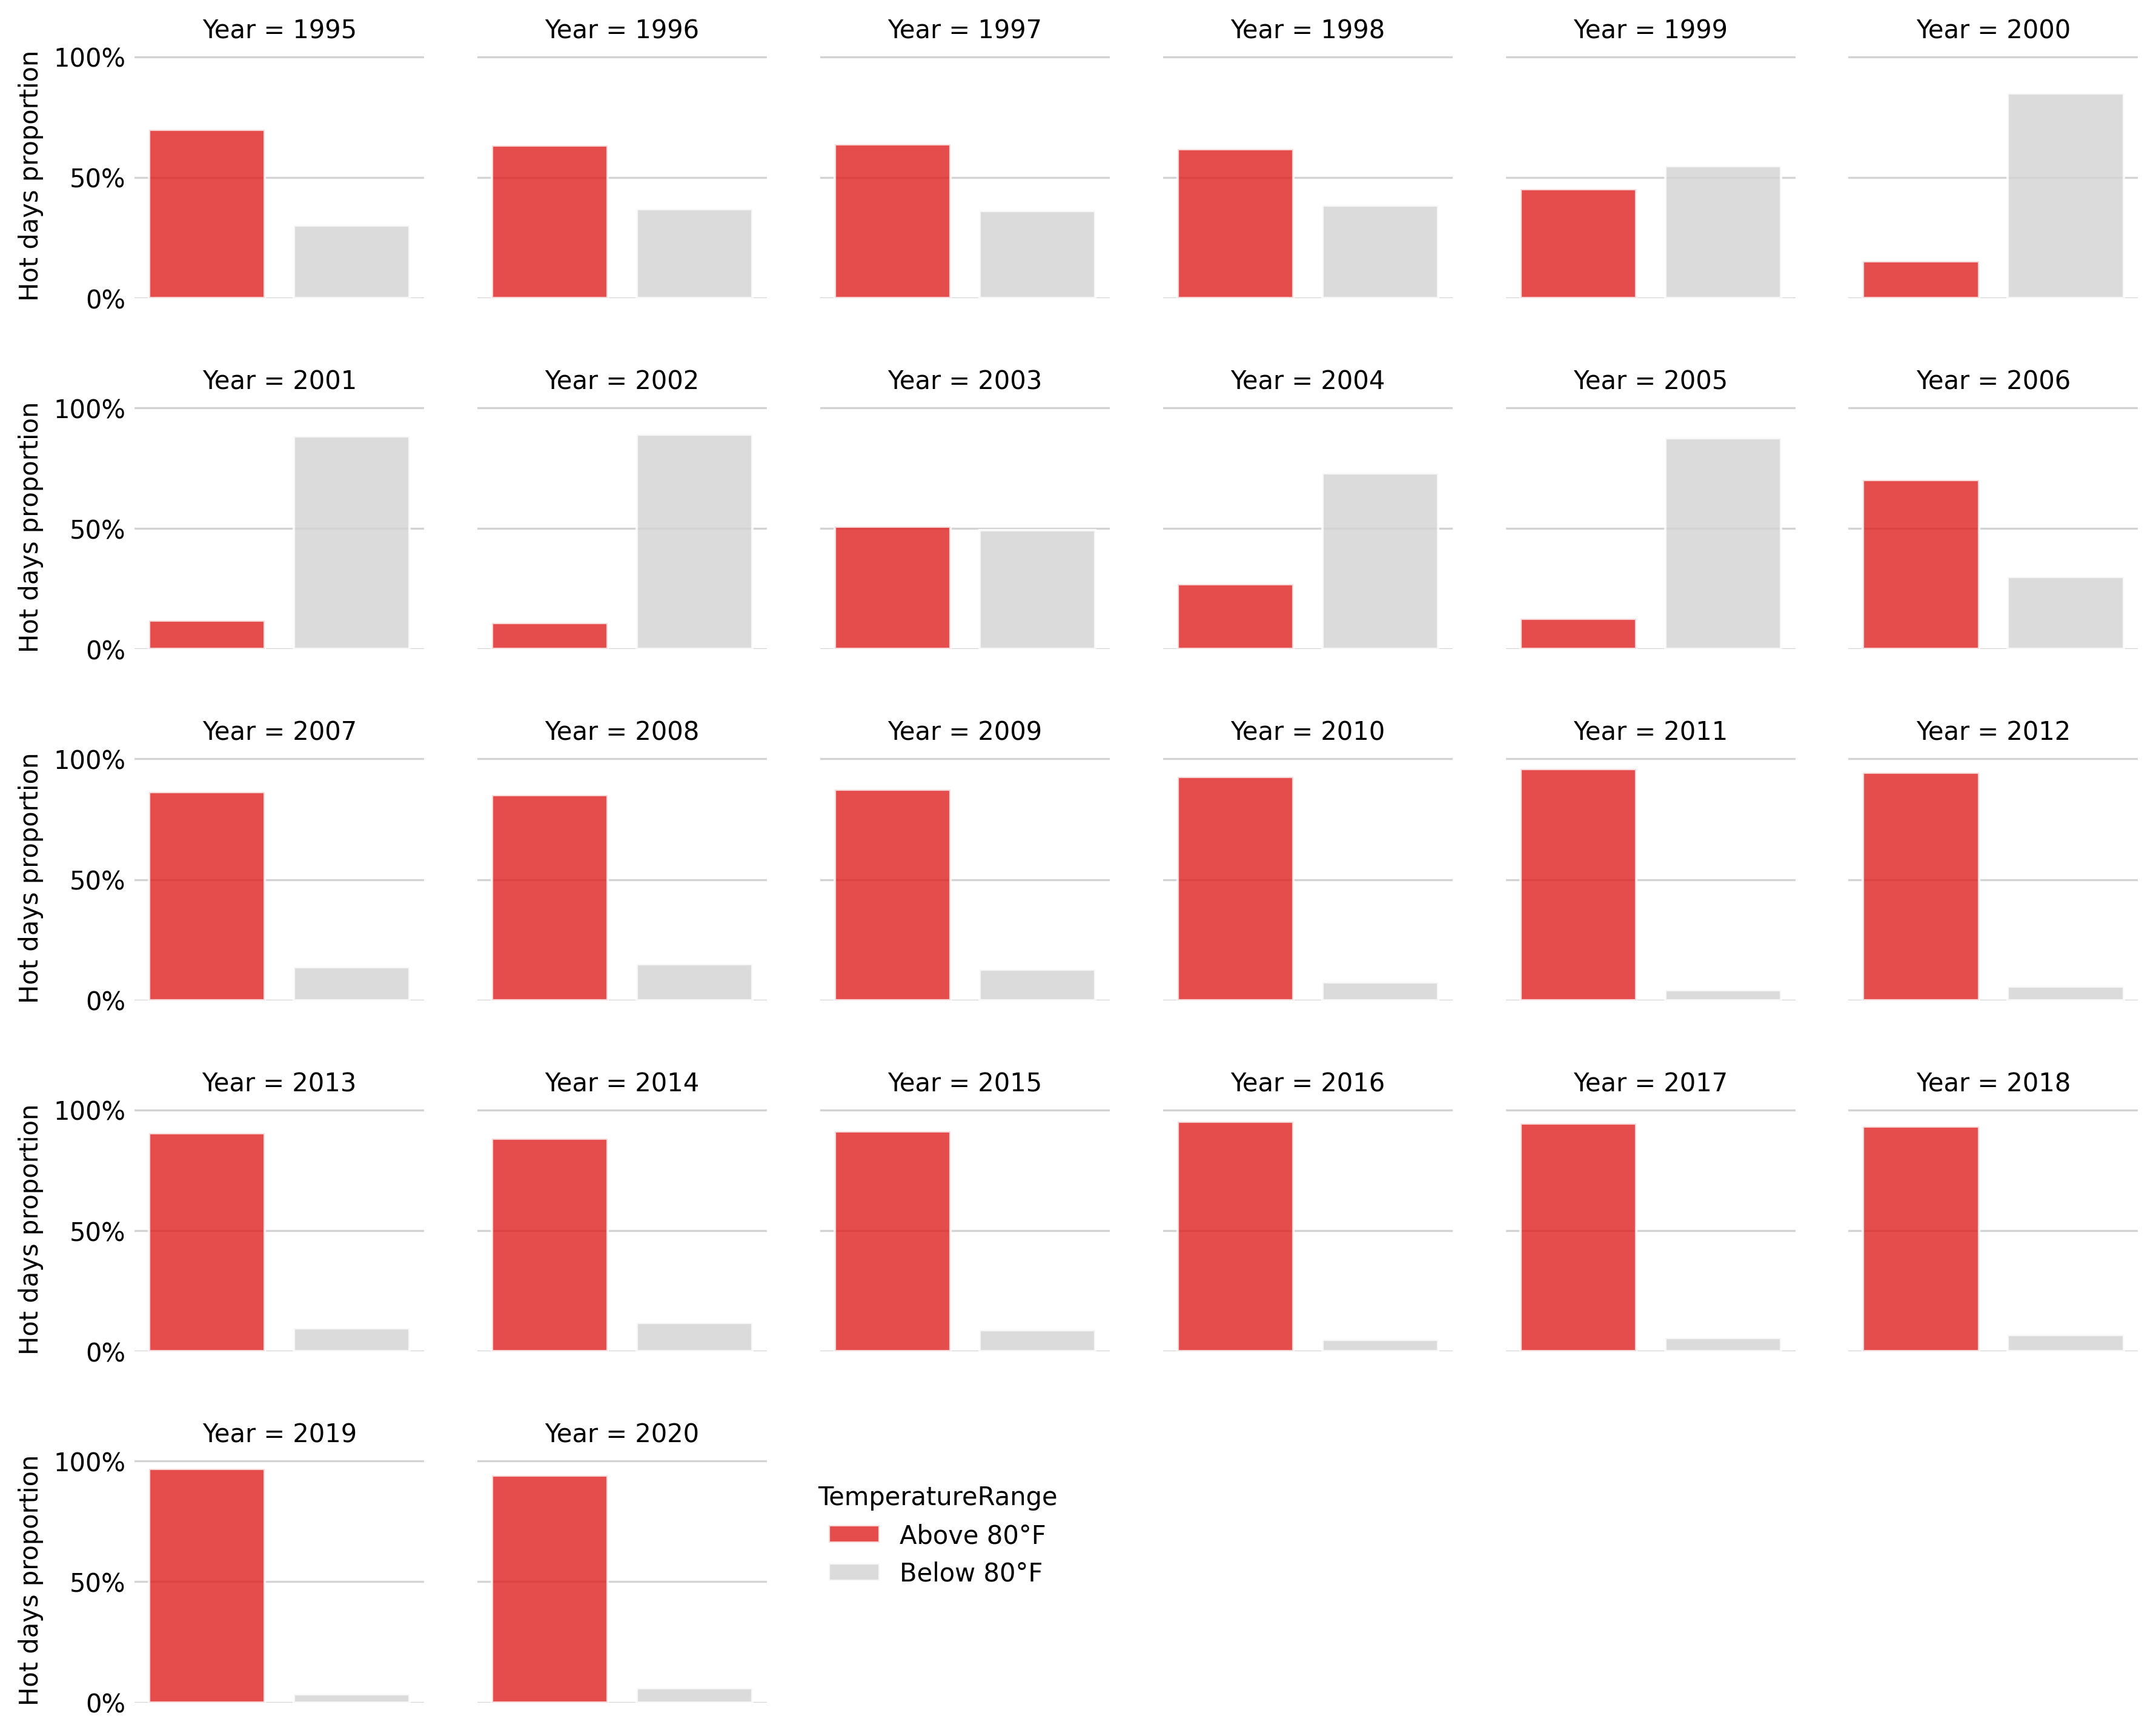

In [ ]:
print(BAD)

# Create figure
plt.figure(figsize=(7, 5))

# Create bar chart with faceting
g = sns.FacetGrid(
   data=jakarta_temperature,
   col='Year',
   hue='TemperatureRange',
   col_wrap=6,
   height=2,
   aspect=1
)

# Map the barplot to the facets
g.map_dataframe(
   sns.barplot,
   x='TemperatureRange',
   y='Percentage',
   hue='TemperatureRange',
   palette=heat_color,
   alpha=0.8,
   edgecolor='white',
   zorder=2
)

g.add_legend(bbox_to_anchor=(0.45, 0.15))

# Customize each subplot
for ax in g.axes:
   # Format y-axis as percentage
   ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0%}'))

   # Remove x labels and title (too crowded)
   ax.set_xticklabels([])

   # Remove spines
   ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
   ax.tick_params(length=0)

   # Add grid for y-axis only
   ax.grid(axis='y', color='lightgrey', linestyle='-', zorder=1)

   # Set labels
   ax.set_xlabel('')
   ax.set_ylabel('Hot days proportion')

plt.show()

<img src="https://i.imgur.com/rSat0Xs.png" width=1024 />

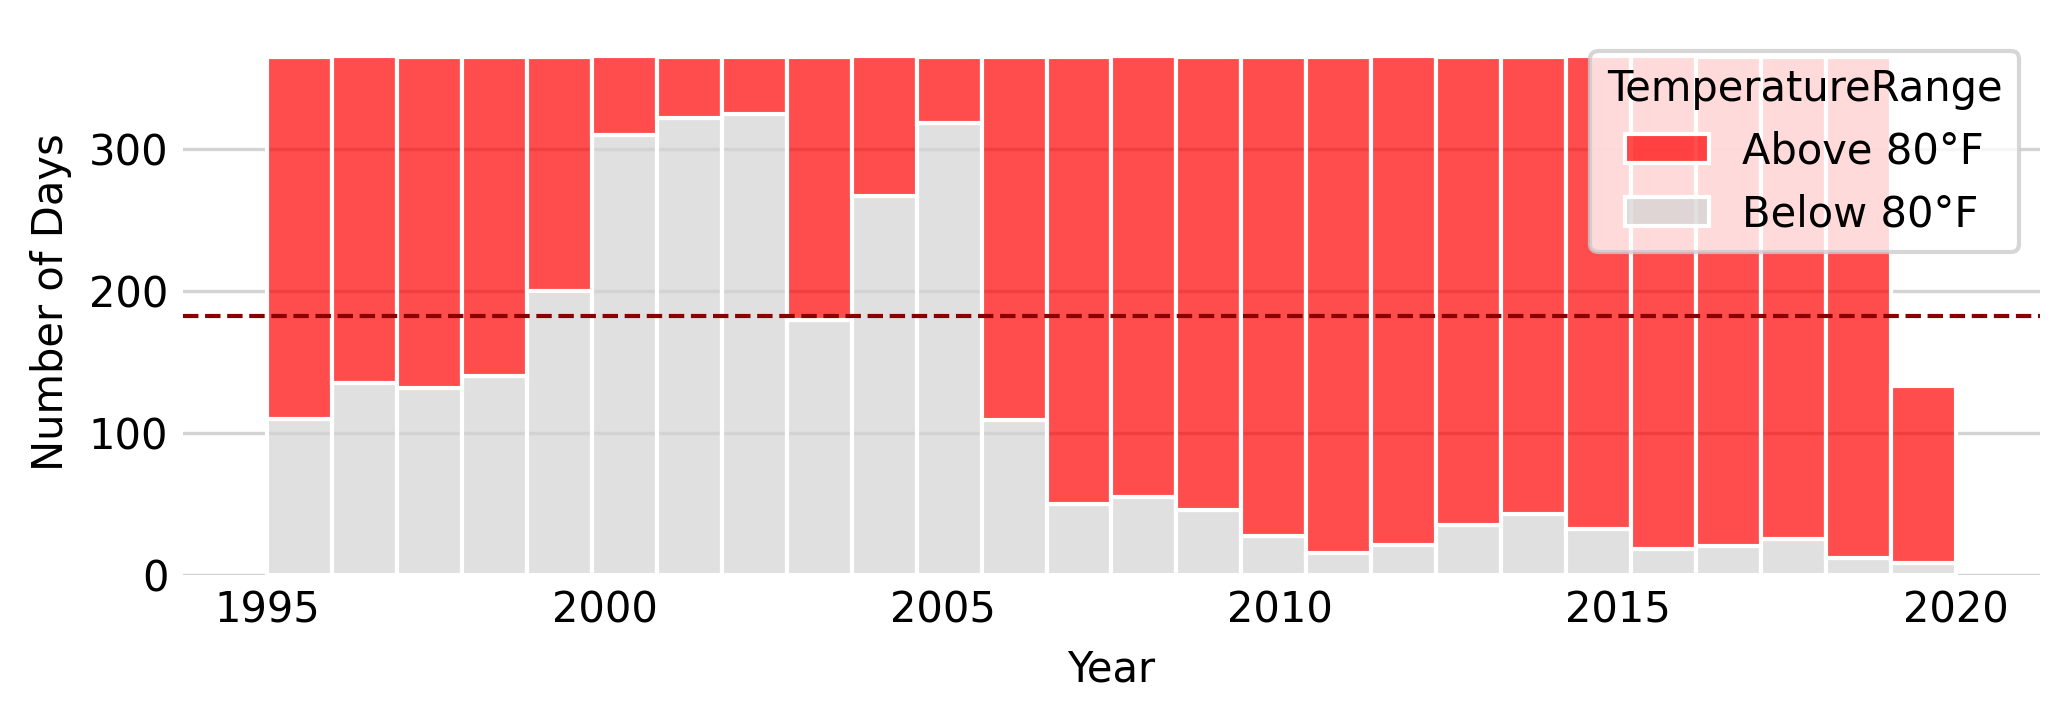

In [ ]:
# Create figure
plt.figure(figsize=(7, 2.5))

# Create stacked histogram
ax = sns.histplot(
    data=jakarta_temperature,
    x='Year',
    weights='n',
    hue='TemperatureRange',
    multiple="stack",
    bins=len(jakarta_temperature['Year'].unique()),
    palette=heat_color,
    alpha=0.7,
    edgecolor='white',
    zorder=2
)

# Add horizontal line at 0.5
plt.axhline(y=365/2, color='darkred', linestyle='--', linewidth=1, zorder=3)

# Customize plot
plt.grid(axis='y', color='lightgrey', linestyle='-', zorder=1)
plt.xlabel('Year')
plt.ylabel('Number of Days')

# Remove spines and ticks
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust legend position and layout
plt.tight_layout()

plt.show()

## <font color="#B0AD89"><strong>  Practice 3.4 ᆢ</strong></font>ᆢᆢ
Choose the best visualization for the following three cases:

**a. Proportion of Temperature Bands in Moscow in 1995, 2000, 2005, and 2010**

In [ ]:
# Define temperature bands order and colors
levels_order = ["Severe Cold", "Cold", "Moderate", "Warm"]

band_color = {
   "Severe Cold": "royalblue",
   "Cold": "skyblue",
   "Moderate": "yellowgreen",
   "Warm": "yellow"  # Added missing color for "Warm"
}

# Data preparation
moscow_temperature = (city_temperature
   .query('City == "Moscow" and AvgTemperature != -99')
   .loc[:, ['Year', 'AvgTemperature']]
   .assign(
       TemperatureBand=lambda x: pd.cut(
           x['AvgTemperature'],
           bins=[-float('inf'), 10, 41, 61,  float('inf')],
           labels=levels_order,
           ordered=True
       )
   )
   .groupby(['Year', 'TemperatureBand'])
   .size()
   .reset_index(name='n')
)

moscow_temperature

     Year TemperatureBand    n
0    1995     Severe Cold   20
1    1995            Cold  159
2    1995        Moderate   99
3    1995            Warm   87
4    1996     Severe Cold   37
..    ...             ...  ...
99   2019            Warm   86
100  2020     Severe Cold    0
101  2020            Cold   99
102  2020        Moderate   33
103  2020            Warm    2

[104 rows x 3 columns]


<ipython-input-163-7a8d444dc7e7>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Year', 'TemperatureBand'])


Visualization:

In [ ]:
# Create figure


**b. Proportion of Income Level in Asian countries in 2010**

In [ ]:
# Data preparation
income_asia = (life_expectancy
   .query('Region in ["Asia", "Middle East"] and Year == 2010')
   .assign(
       Income_Category=lambda x: pd.cut(
           x['GDP_per_capita'],
           bins=[-float('inf'), 1044, 4095, 12695, float('inf')],
           labels=["Low Income", "Lower-mid Income", "Middle Income", "Upper Income"],
           ordered=True
       )
   )
   .loc[:, ['Country', 'Region', 'Income_Category']]
   .groupby('Income_Category')
   .size()
   .reset_index(name='n')
   .assign(Percentage=lambda x: x['n']/x['n'].sum())
)

income_asia

    Income_Category   n  Percentage
0        Low Income   7    0.170732
1  Lower-mid Income  13    0.317073
2     Middle Income  11    0.268293
3      Upper Income  10    0.243902


<ipython-input-165-70fe60a9c7a9>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Income_Category')


Visualization:

## <font color="#B0AD89"><strong>3.5 ⫶ </strong></font>Nested Proportions

<img src="https://i.imgur.com/sxjSXdn.png" width=1024 />

<img src="https://i.imgur.com/OBXweBc.png" width=1024 />

### <font color="#B0AD89"><strong>a ⬝ </strong></font>Mosaic Plot


<img src="https://i.imgur.com/ekT3EVB.png" width=1024 />


<img src="https://i.imgur.com/0rwJupF.png" width=1024 />


<img src="https://i.imgur.com/OSHE20b.png" width=1024 />

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Treemaps

<img src="https://i.imgur.com/kVUfkiu.png" width=1024 />

<img src="https://i.imgur.com/WqJN7BB.png" width=1024 />


<img src="https://i.imgur.com/0U1thul.png" width=1024 />


<img src="https://i.imgur.com/76QAgYz.png" width=1024 />


### <font color="#B0AD89"><strong>c ⬝ </strong></font>Parallel sets plot / Alluvial diagram

<img src="https://i.imgur.com/JAKpIl3.png" width=1024 />

<img src="https://i.imgur.com/Sy7K3Wi.png" width=1024 />

<img src="https://i.imgur.com/owpNwJe.png" width=1024 />

<img src="https://i.imgur.com/tTuqdMQ.png" width=1024 />

<img src="https://i.imgur.com/FN15ARJ.png" width=1024 />

---
---